One Class Surrounding another Class. Bidimensional.
100 batches of 525 instances



METHOD: Static lp as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  2.1262130859405093
Average MCC:  0.0191063909347
Average error: 35.8552
Average macro-F1: 0.4670155525008431
Average micro-F1: 0.6403
Average Accuracy:  64.1448
Standard Deviation:  12.705913779
Variance:  161.44024496


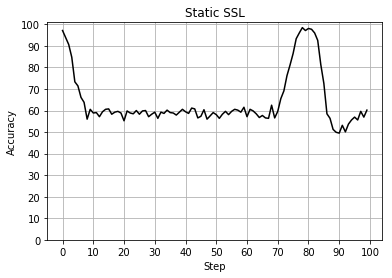

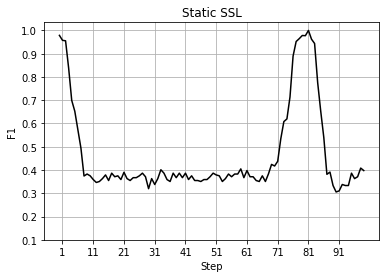

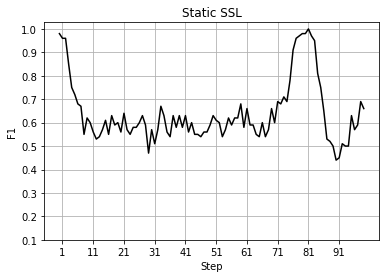




METHOD: Sliding lp as classifier
Execution time:  1.6473411763590415
Average MCC:  0.848890990424
Average error: 9.0442
Average macro-F1: 0.9029032292415734
Average micro-F1: 0.9137999999999998
Average Accuracy:  90.9558
Standard Deviation:  16.872427459
Variance:  284.67880836


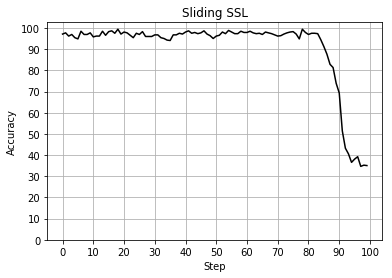

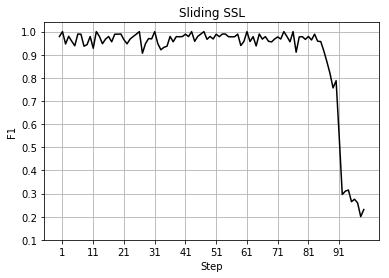

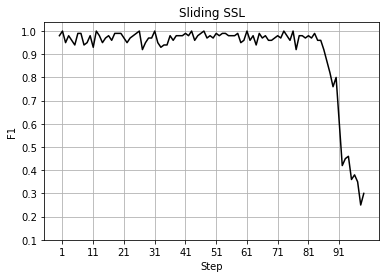




METHOD: Incremental lp as classifier
Execution time:  44.0023964434977
Average MCC:  0.0127554987618
Average error: 36.0553
Average macro-F1: 0.4659408781420922
Average micro-F1: 0.6384
Average Accuracy:  63.9447
Standard Deviation:  12.5680043328
Variance:  157.95473291


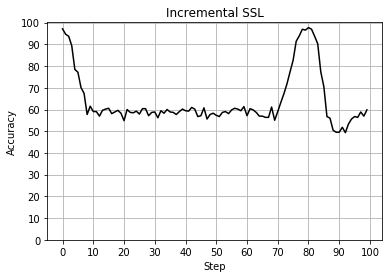

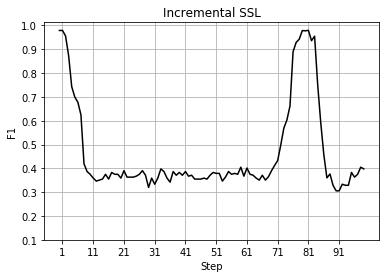

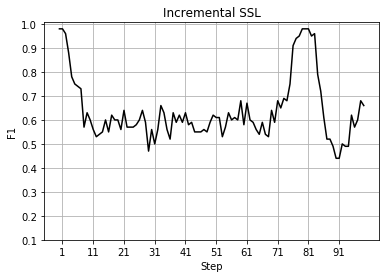




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  4.72902489717535
Average MCC:  0.919637063722
Average error: 4.3895
Average macro-F1: 0.9582713331309833
Average micro-F1: 0.9607000000000001
Average Accuracy:  95.6105
Standard Deviation:  3.42585445546
Variance:  11.73647875


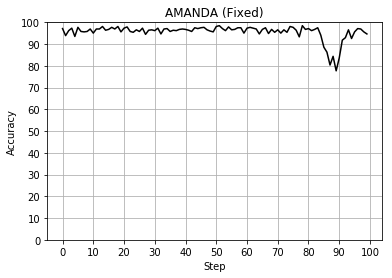

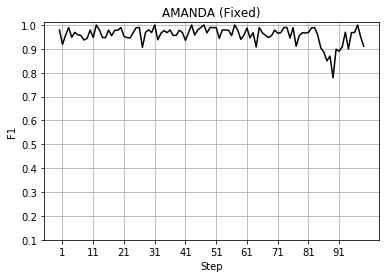

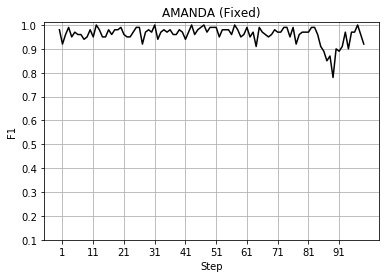




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  5.277141618907017
Average MCC:  0.838808124333
Average error: 9.6515
Average macro-F1: 0.8978110729227885
Average micro-F1: 0.9080999999999999
Average Accuracy:  90.3485
Standard Deviation:  16.523252487
Variance:  273.01787275


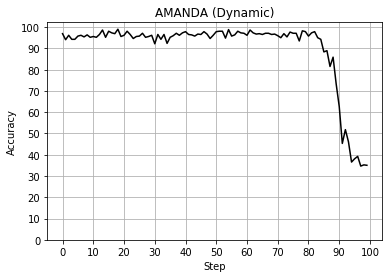

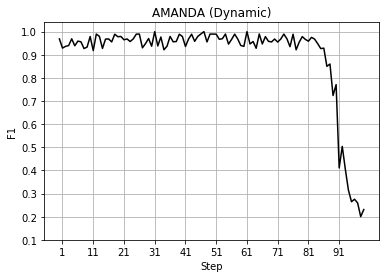

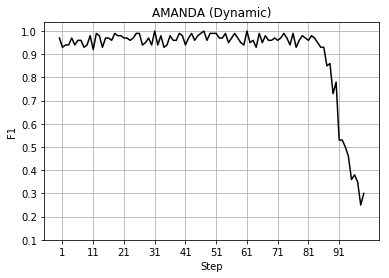




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  64.85507482268648
Average MCC:  0.89954001745
Average error: 5.5089
Average macro-F1: 0.9472429880861922
Average micro-F1: 0.9501000000000001
Average Accuracy:  94.4911
Standard Deviation:  4.0716588499
Variance:  16.57840579


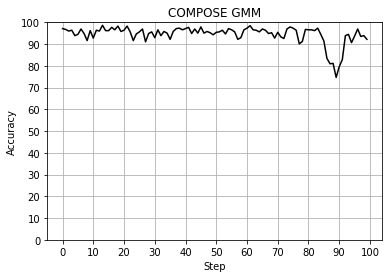

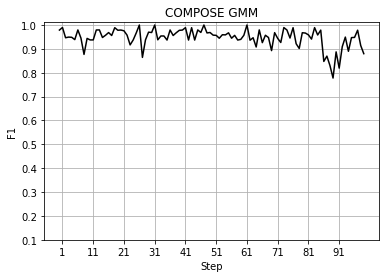

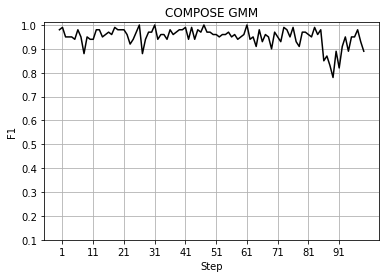




Method: Level IW
Execution time:  64.85507482268648
Average MCC:  0.00636871768099
Average macro-F1: 0.5001275142381539
Average micro-F1: 0.5368
Average Accuracy:  90.801904
Standard Deviation:  16.5147633596
Variance:  272.737408824


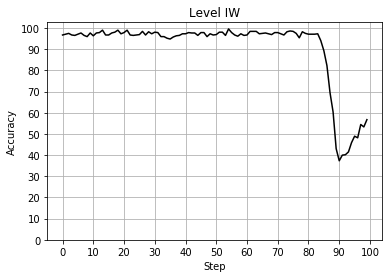

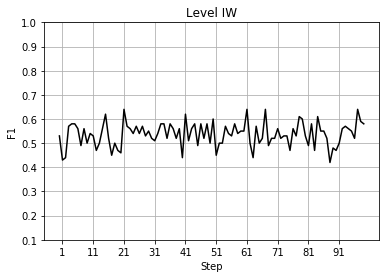

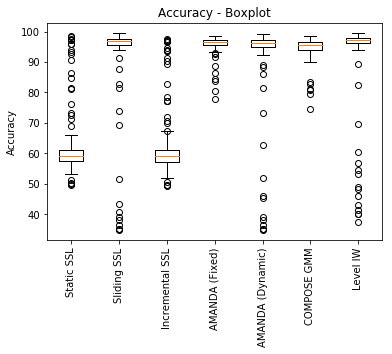

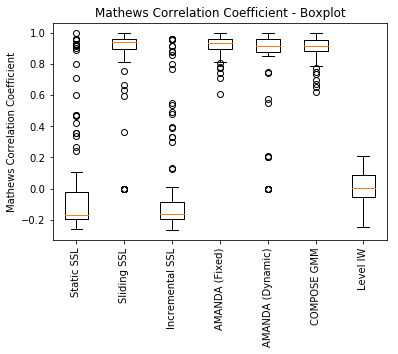

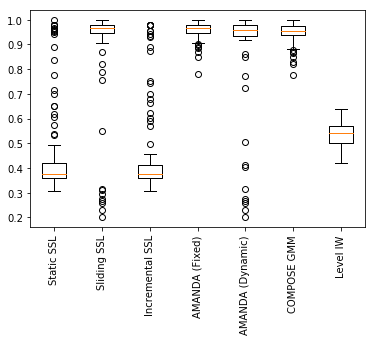

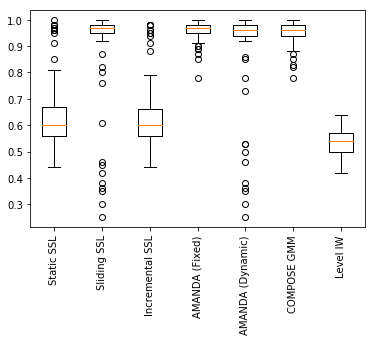

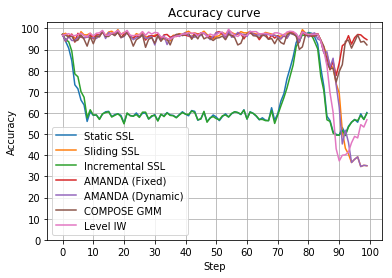

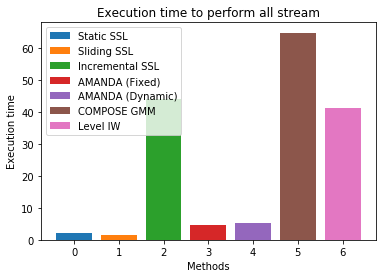

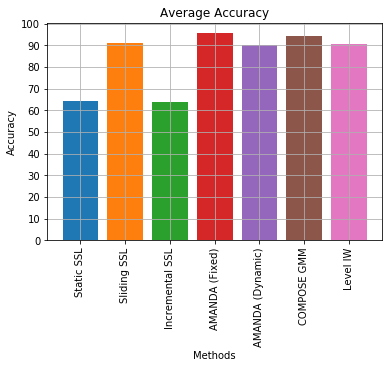

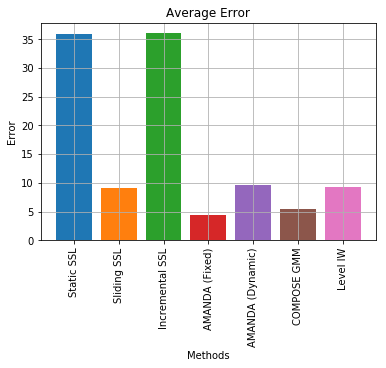

Error reduction: 41.7976203839
Error reduction: -0.31195046208
Error reduction: 49.0541711877
Error reduction: 40.8508561879
Error reduction: 47.3090570085
Error reduction: 41.5577007022


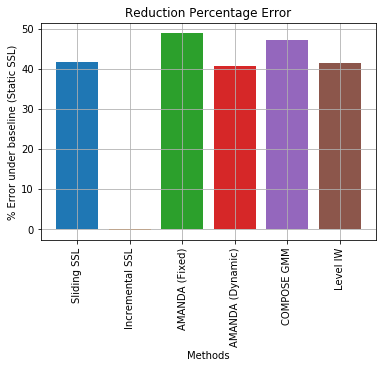

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    # sgd=sthocatic gradient descent, lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    sslClassifier = 'lp'
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 7, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 7, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 7, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 7, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 7)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CSurr', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()